In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df0 = pd.read_csv("data/train.csv")
df0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df0.shape

(891, 12)

In [4]:
df0.dropna().shape

(183, 12)

In [5]:
df = df0.drop(["Cabin", "PassengerId", "Name"], axis=1)

In [6]:
counts = df.groupby(['Survived', 'Pclass']).size().reset_index(name='count')

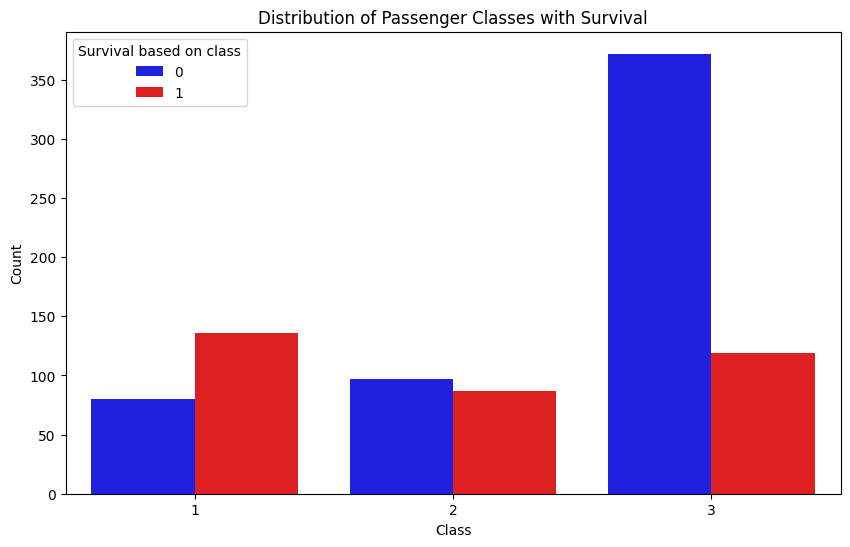

In [7]:
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='count', hue='Survived', data=counts, palette={0: 'blue', 1: 'red'})

# Add plot title and labels
plt.title('Distribution of Passenger Classes with Survival')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Survival based on class',)

# Show the plot
plt.show()

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (0.01 + n * (min(r, k) - 1)))

categorical_columns = df.columns
corr_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        corr_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Convert to numeric values for plotting
corr_matrix = corr_matrix.astype(float)
corr_matrix

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Survived,0.997622,0.339815,0.540933,0.381936,0.204526,0.177036,0.927544,0.691299,0.172616
Pclass,0.339815,0.999997,0.138013,0.446092,0.168943,0.084984,0.999997,0.976096,0.263821
Sex,0.540933,0.138013,0.997535,0.352469,0.221572,0.260260,0.859778,0.643672,0.122569
Age,0.381936,0.446092,0.352469,1.000000,0.416871,0.438386,0.862534,0.570540,0.401859
SibSp,0.204526,0.168943,0.221572,0.416871,0.999999,0.252811,0.913603,0.864875,0.123250
Parch,0.177036,0.084984,0.260260,0.438386,0.252811,0.999999,0.683836,0.630889,0.097115
Ticket,0.927544,0.999997,0.859778,0.862534,0.913603,0.683836,1.000000,0.997974,0.997806
Fare,0.691299,0.976096,0.643672,0.570540,0.864875,0.630889,0.997974,1.000000,0.955727
Embarked,0.172616,0.263821,0.122569,0.401859,0.123250,0.097115,0.997806,0.955727,0.999997


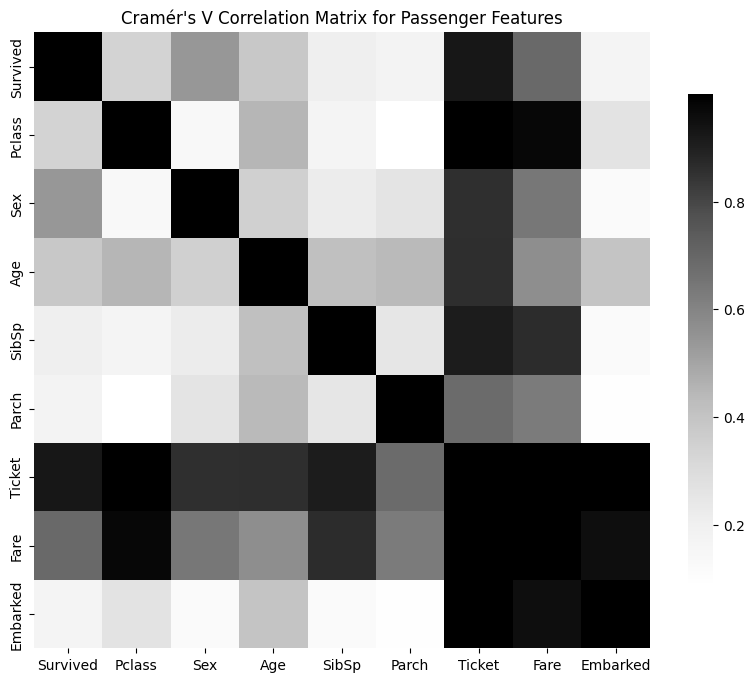

In [9]:
# Plotting the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=False, cmap='Grays', square=True, cbar_kws={"shrink": .8})
plt.title("Cramér's V Correlation Matrix for Passenger Features")
plt.show()

In [10]:
x = df.Fare
y = df.Survived

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df.drop("Survived", axis=1)
X = pd.get_dummies(x)
X.describe()

,0.0000,4.0125,5.0000,6.2375,6.4375,6.4500,6.4958,6.7500,6.8583,6.9500,...,153.4625,164.8667,211.3375,211.5000,221.7792,227.5250,247.5208,262.3750,263.0000,512.3292
count,891,891,891,891,891,891,891,891,891,891,...,891,891,891,891,891,891,891,891,891,891
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,876,890,890,890,890,890,889,889,890,890,...,888,889,888,890,890,887,889,889,887,888


In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=10, criterion='entropy')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [13]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6983240223463687
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.91      0.78       105
           1       0.76      0.39      0.52        74

    accuracy                           0.70       179
   macro avg       0.72      0.65      0.65       179
weighted avg       0.71      0.70      0.67       179



In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix(y_test, y_pred)

array([[96,  9],
       [45, 29]])

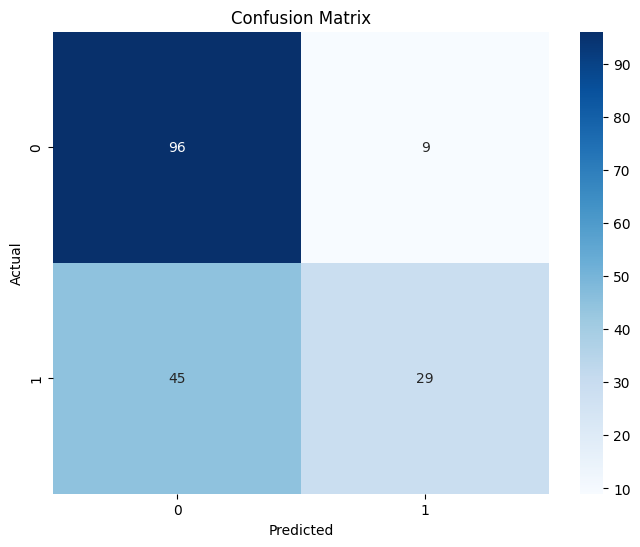

In [15]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()